# 1. Import Libraries & Load Data

In [1]:
#Import Libaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TensorFlow
import tensorflow as tf
import tensorflow_recommenders as tfrs
from tensorflow.keras import layers, regularizers
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Embedding,GlobalMaxPooling1D, Dense, Embedding
from tensorflow.keras.models import Sequential

# Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# SK-Learn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.model_selection import train_test_split


In [2]:
# Read the data set

df_movies = pd.read_csv('tmdb_5000_movies.csv')
df_credits = pd.read_csv('tmdb_5000_credits.csv')

In [3]:
df_movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
df_credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


Similar to the content based filtering, the dataset will be joined.

# 2. Data Cleaning / Preparation

In [5]:
# Rename the id for joining

df_credits.rename(columns={'movie_id':'id'},inplace=True)

In [6]:
# Combine the 2 datasets

df_combine = pd.merge(df_movies,df_credits,on=['id','title'])

In [7]:
# Check for Null & Repeated Columns

df_combine.isna().sum().sort_values()

budget                     0
vote_count                 0
vote_average               0
title                      0
status                     0
spoken_languages           0
revenue                    0
cast                       0
production_companies       0
production_countries       0
original_title             0
original_language          0
keywords                   0
id                         0
genres                     0
popularity                 0
crew                       0
release_date               1
runtime                    2
overview                   3
tagline                  844
homepage                3091
dtype: int64

In the above, tagline and homepage are redundant columns due to the high number of NA values. It will be dropped later in this script.

In [8]:
# Create a 0 if the movie is rated poorly or 1 if positive (Using 7.5 as a benchmark)

df_combine['positive_review'] = [1 if x>=7.5 else 0 for x in df_combine.vote_average] 


In [9]:
df_combine.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,positive_review
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",0
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",1
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",0


In [10]:
# Use Regex to remove special characters for visual plotting

df_combine['genres'] = df_combine['genres'] \
                        .str.replace(r'[{}:""]', "") \
                        .str.replace("id ", "") \
                        .str.replace('name', "") \
                        .str.replace(r'\d', "") \
                        .str.replace(",  ","") \
                        .str.strip('[]') \
                        .str.replace(" ","")

# Do the same for keywords for visual plotting

df_combine['keywords'] = df_combine['keywords'] \
                        .str.replace(r'[{}:""]', "") \
                        .str.replace("id ", "") \
                        .str.replace('name', "") \
                        .str.replace(r'\d', "") \
                        .str.replace(",  ","") \
                        .str.strip('[]') \
                        .str.replace(" ","")


C:\Users\ezlik\AppData\Local\Temp\ipykernel_3004\3675139579.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['genres'] = df_combine['genres'] \
C:\Users\ezlik\AppData\Local\Temp\ipykernel_3004\3675139579.py:14: FutureWarning: The default value of regex will change from True to False in a future version.
  df_combine['keywords'] = df_combine['keywords'] \


In [11]:
df_combine.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,positive_review
0,237000000,"Action,Adventure,Fantasy,ScienceFiction",http://www.avatarmovie.com/,19995,"cultureclash,future,spacewar,spacecolony,socie...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",0
1,300000000,"Adventure,Fantasy,Action",http://disney.go.com/disneypictures/pirates/,285,"ocean,drugabuse,exoticisland,eastindiatradingc...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",0
2,245000000,"Action,Adventure,Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy,basedonnovel,secretagent,sequel,mi,british...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",0
3,250000000,"Action,Crime,Drama,Thriller",http://www.thedarkknightrises.com/,49026,"dccomics,crimefighter,terrorist,secretidentity...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",1
4,260000000,"Action,Adventure,ScienceFiction",http://movies.disney.com/john-carter,49529,"basedonnovel,mars,medallion,spacetravel,prince...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",0


# 3. Exploratory Data Analysis

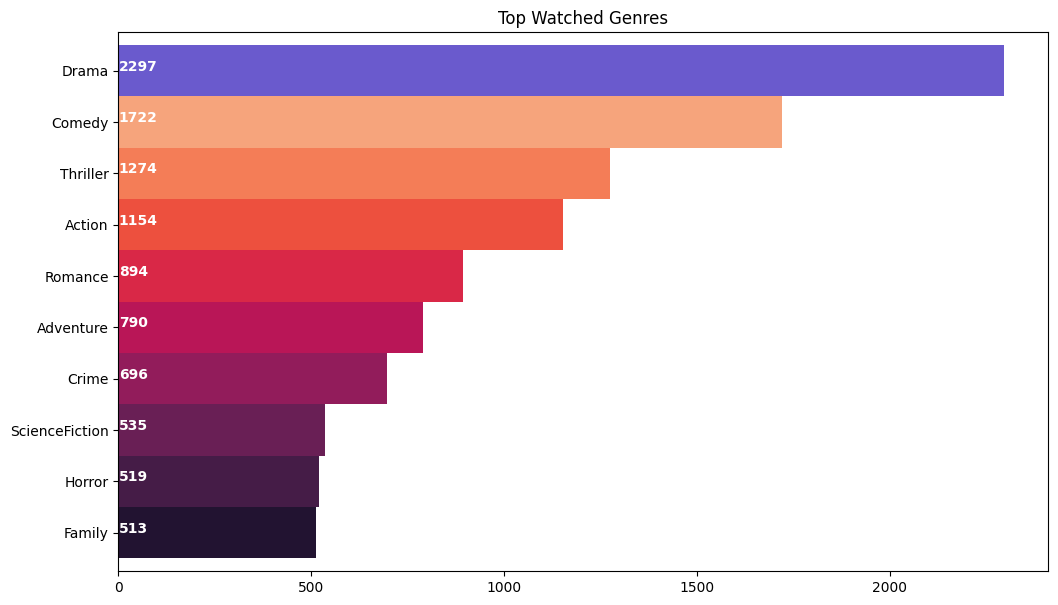

In [12]:
# Plot a bar chart for top genres

df_genres = df_combine.filter(['genres'], axis=1)
df_genres['genres'] = df_genres['genres'].str.split(',')

plt.subplots(figsize=(12,7))
genre_list=[]

for i in df_genres['genres']:
    genre_list.extend(i)
    
ax=pd.Series(genre_list).value_counts()[:10].sort_values(ascending=True).plot.barh(width=1.0,color=sns.color_palette('rocket',10))

for i, v in enumerate(pd.Series(genre_list).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white', weight = 'bold')
    
ax.patches[9].set_facecolor('slateblue')

plt.title('Top Watched Genres')
plt.show()

In the chart above, it is observed that Drama is the most frequently appeared genre among the dataset.

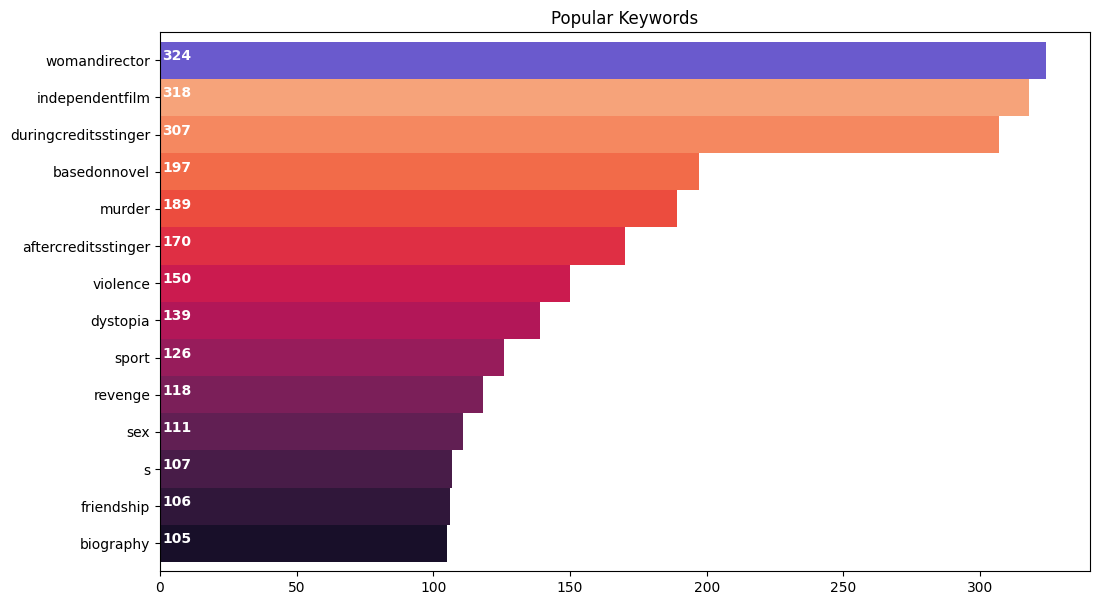

In [13]:
# Plot a bar chart for top keywords

df_keywords = df_combine.filter(['keywords'], axis=1)
df_keywords['keywords'] = df_keywords['keywords'].str.split(',')

plt.subplots(figsize=(12,7))
keywords_list=[]

for i in df_keywords['keywords']:
    keywords_list.extend(i)
    
ax=pd.Series(keywords_list).value_counts()[1:15].sort_values(ascending=True).plot.barh(width=1.0,color=sns.color_palette('rocket',15))

for i, v in enumerate(pd.Series(keywords_list).value_counts()[1:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
ax.patches[13].set_facecolor('slateblue')

plt.title('Popular Keywords')
plt.show()

In the chart above, it is observed that the top keywords are Woman Director, Independent Films and During Credit Stinger.

# 4. TensorFlow Movie Recommender (Using NLTK)

## 4.1 Data Processing (Remove Stopwords & Lemmatizing it)

In [14]:
# Create a filtered dataframe

df_combine_filtered = df_combine[[
                        'genres',
                        'id',
                        'keywords',
                        'original_title', 
                        'overview', 
                        'vote_average', 
                        'positive_review']]

In [15]:
# Remove Stopwords

stop_words = stopwords.words('english')
df_combine_filtered['overview'] = df_combine_filtered['overview'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))

C:\Users\ezlik\AppData\Local\Temp\ipykernel_3004\2980868779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combine_filtered['overview'] = df_combine_filtered['overview'].apply(lambda x: ' '.join([word for word in str(x).split() if word not in (stop_words)]))


In [16]:
# Lemmatize words

lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(word):
    
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

df_combine_filtered['overview'] = df_combine_filtered['overview'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(x)]))

C:\Users\ezlik\AppData\Local\Temp\ipykernel_3004\1524219153.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combine_filtered['overview'] = df_combine_filtered['overview'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in nltk.word_tokenize(x)]))


## 3.2 Training and Visualising the Results

In [17]:
# Determine the vocabulary size base on length of words

len(list(df_combine_filtered['overview']))

4803

In [18]:
# Split the dataset into a training and validation set

text = df_combine_filtered['overview']
labels = df_combine_filtered['positive_review']

X_train, X_test , y_train, y_test = train_test_split(text, labels , test_size = 0.6, random_state = 42)

In [19]:
# Use One_Hot to encode the text to numerical form

X_train = [one_hot(d, 4804, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_train]
X_test = [one_hot(d,  4804, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~',lower=True, split=' ') for d in X_test]

In [20]:
# Get a sensing of the max length

max(X_train, key=len)

[4417,
 443,
 2084,
 2888,
 4291,
 3024,
 2186,
 5,
 4590,
 2091,
 3617,
 458,
 1120,
 4553,
 975,
 866,
 1636,
 1926,
 4205,
 1883,
 4553,
 2359,
 1625,
 4123,
 2344,
 1934,
 2084,
 2973,
 521,
 1430,
 3118,
 4417,
 1559,
 1649,
 2741,
 2344,
 909,
 2303,
 1957,
 2942,
 3090,
 2969,
 1830,
 4780,
 2527,
 160,
 4274,
 226,
 2600,
 2084,
 2196,
 1894,
 4203,
 2971,
 160,
 894,
 3195,
 413,
 2146,
 4564,
 1037,
 2431,
 3067,
 4205,
 1180,
 1701,
 1777,
 4128,
 4034,
 4128,
 3962,
 3266,
 115,
 3034,
 3369,
 4564,
 3434,
 3484,
 3774,
 3434,
 1036,
 3774,
 1400,
 615,
 766,
 2203,
 875,
 2129,
 2472,
 2920,
 2472,
 4468,
 2930,
 1078,
 3434,
 4172,
 1290,
 515,
 4405,
 939,
 4665,
 1898,
 1187,
 2061,
 3129,
 3589,
 2203,
 3616,
 2719,
 4715,
 2619,
 1451,
 894,
 3837]

In [21]:
# Pad the sequence

X_train = pad_sequences(X_train, maxlen=5000, padding='post')
X_test = pad_sequences(X_test, maxlen=5000, padding='post')

In [22]:
# Build the 1D Model

model = Sequential([
    
            Embedding(300, 8, input_length=5000),
            tf.keras.layers.Conv1D(8, 4, activation='relu'),
            tf.keras.layers.Dropout(0.5),         
            GlobalMaxPooling1D(),
            Dense(16, activation='relu'),
            Dense(8, activation='relu'),
            Dense(1, activation='sigmoid')
    
            ])

# Compile the Model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 5000, 8)           2400      
                                                                 
 conv1d (Conv1D)             (None, 4997, 8)           264       
                                                                 
 dropout (Dropout)           (None, 4997, 8)           0         
                                                                 
 global_max_pooling1d (Globa  (None, 8)                0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 16)                144       
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                        

In [23]:
# Train the Model

history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
61/61 [==============================] - 3s 8ms/step - loss: 0.4625 - accuracy: 0.9276 - val_loss: 0.3488 - val_accuracy: 0.9313
Epoch 2/15
61/61 [==============================] - 0s 6ms/step - loss: 0.2635 - accuracy: 0.9276 - val_loss: 0.3122 - val_accuracy: 0.9313
Epoch 3/15
61/61 [==============================] - 0s 5ms/step - loss: 0.2600 - accuracy: 0.9276 - val_loss: 0.3147 - val_accuracy: 0.9313
Epoch 4/15
61/61 [==============================] - 0s 6ms/step - loss: 0.2618 - accuracy: 0.9276 - val_loss: 0.2991 - val_accuracy: 0.9313
Epoch 5/15
61/61 [==============================] - 0s 6ms/step - loss: 0.2589 - accuracy: 0.9276 - val_loss: 0.3111 - val_accuracy: 0.9313
Epoch 6/15
61/61 [==============================] - 0s 5ms/step - loss: 0.2578 - accuracy: 0.9276 - val_loss: 0.3059 - val_accuracy: 0.9313
Epoch 7/15
61/61 [==============================] - 0s 6ms/step - loss: 0.2564 - accuracy: 0.9276 - val_loss: 0.3086 - val_accuracy: 0.9313
Epoch 8/15
61/61 [==

91/91 [==============================] - 0s 1ms/step - loss: 0.2915 - accuracy: 0.9313
Loss is 0.2915079593658447,
Accuracy is 93.12977194786072


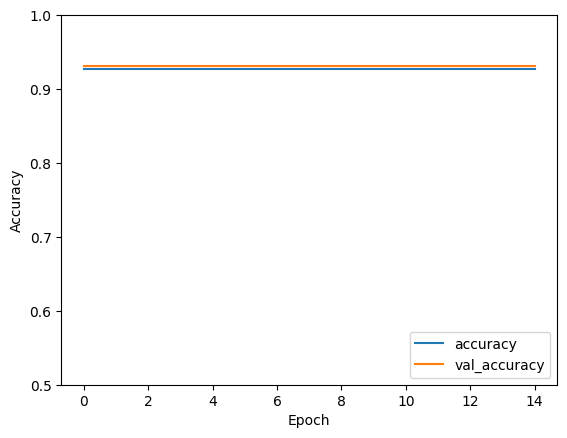

91/91 [==============================] - 0s 2ms/step - loss: 0.2915 - accuracy: 0.9313


[0.2915079593658447, 0.9312977194786072]

In [24]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Loss is {loss},\nAccuracy is {acc * 100}")


def plot_training (history):
  plt.plot(history.history['accuracy'], label = 'accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.ylim([0.5,1])
  plt.legend(loc = 'lower right')
  plt.show()

plot_training(history)
model.evaluate(X_test, y_test)

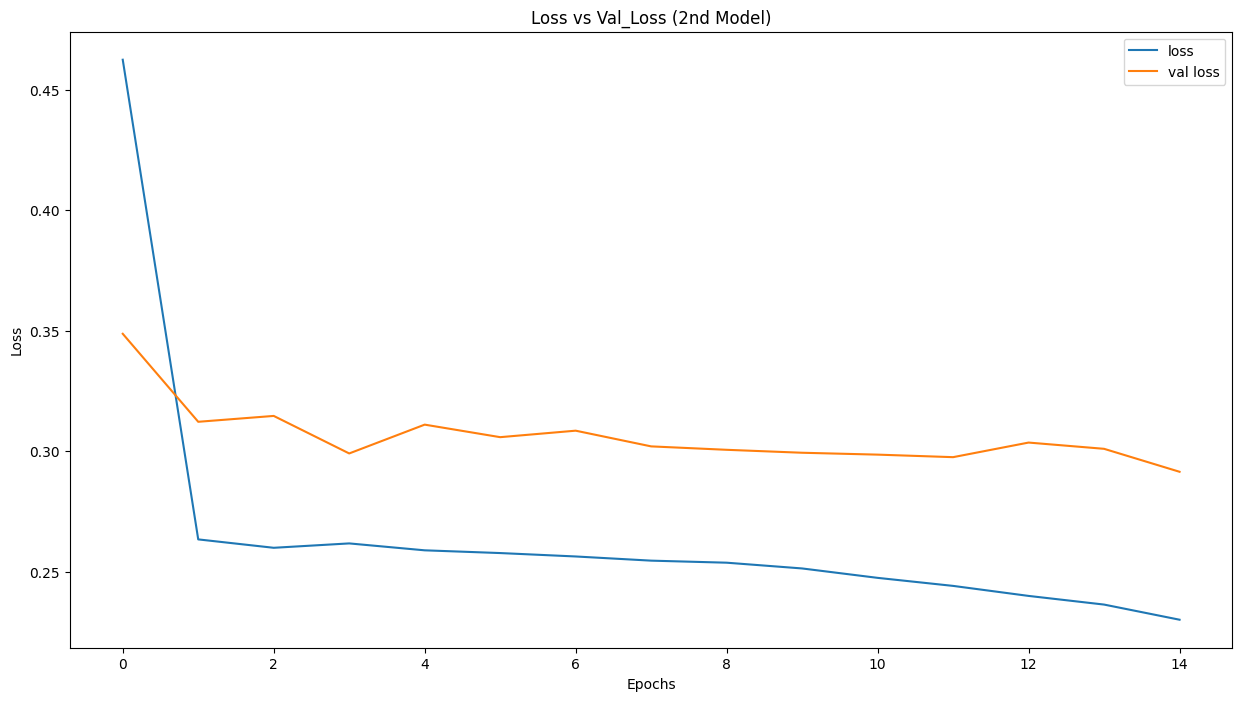

In [25]:
# Plot loss vs Accuracy Loss

plt.figure(figsize=(15,8))
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss vs Val_Loss (2nd Model)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()